In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import classification_report

# CSV 파일 불러오기 (경로 수정 완료)
data = pd.read_csv('C:/skproject/pyproject/dataset/creditcard.csv')

In [3]:
print("데이터 요약 정보:")
print(data.info())  # 주석 처리로 간략화

print("\n결측치 확인:")
print(data.isnull().sum())

데이터 요약 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21 

In [4]:
# 'Class'는 라벨, 나머지는 특성
features = data.drop(columns=['Class'])
labels = data['Class']

# 'Time'과 'Amount' 포함 전체 스케일링
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [5]:
# 모델 생성 및 학습
model = IsolationForest(n_estimators=100, contamination=0.005, random_state=42)
model.fit(features_scaled)

# 예측: -1은 이상치, 1은 정상치
predictions = model.predict(features_scaled)
data['Anomaly'] = predictions

In [6]:
# 이상치/정상치로 분리
outliers = data[data['Anomaly'] == -1]
normal = data[data['Anomaly'] == 1]

print(f"이상치 수: {len(outliers)}")
print(f"정상치 수: {len(normal)}")

이상치 수: 1424
정상치 수: 283383


In [7]:
# 이상치 통계
print("\n이상치 데이터의 주요 통계:")
print(outliers.describe())

# 실제 Class와 Anomaly의 관계
print("\nClass와 Anomaly의 관계 분석:")
comparison = data.groupby(['Class', 'Anomaly']).size().unstack(fill_value=0)
print(comparison)


이상치 데이터의 주요 통계:
                Time           V1           V2           V3           V4  \
count    1424.000000  1424.000000  1424.000000  1424.000000  1424.000000   
mean    89679.556180   -10.507784    -3.496353    -6.218268     2.627891   
std     48367.022688     7.314125    11.835987     5.775986     3.667066   
min       103.000000   -56.407510   -72.715728   -48.325589    -5.266509   
25%     46062.750000   -13.671907   -11.297780    -7.891219    -0.279569   
50%     85285.000000    -8.761864    -1.202260    -4.928365     2.329072   
75%    134092.750000    -5.281138     5.639228    -2.795369     5.151047   
max    172786.000000     1.261630    22.057729     9.382558    16.875344   

                V5           V6           V7           V8           V9  ...  \
count  1424.000000  1424.000000  1424.000000  1424.000000  1424.000000  ...   
mean     -3.899690     1.072432    -0.763136    -2.442457     0.301076  ...   
std       8.162661     5.386378    10.182421     8.707941    

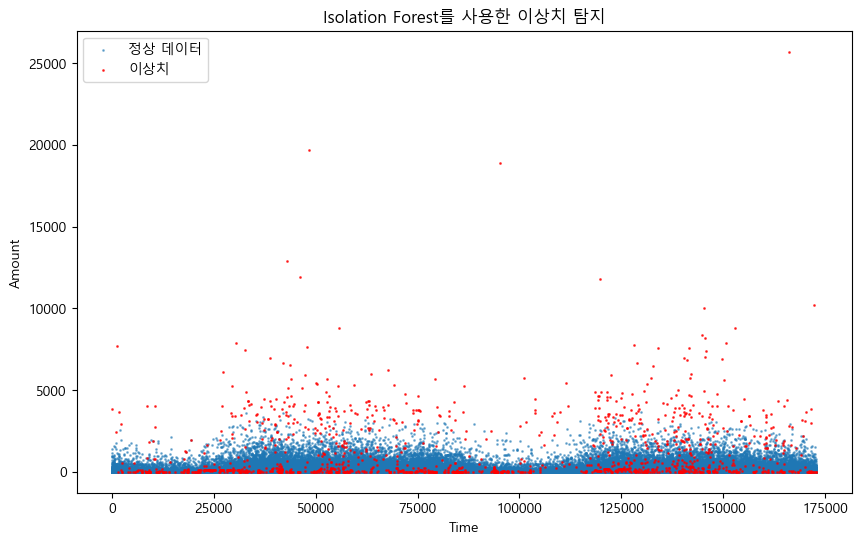

In [8]:
mpl.rc('font', family='Malgun Gothic')  # 한글 폰트 설정

plt.figure(figsize=(10, 6))
plt.scatter(normal['Time'], normal['Amount'], label='정상 데이터', s=1, alpha=0.5)
plt.scatter(outliers['Time'], outliers['Amount'], label='이상치', color='red', s=1, alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Isolation Forest를 사용한 이상치 탐지')
plt.legend()
plt.show()


In [9]:
# 이상치 데이터 저장
outliers.to_csv('outliers_detected.csv', index=False)
print("이상치 탐지가 완료되었습니다. 결과는 'outliers_detected.csv'에 저장되었습니다.")

# Classification Report 출력
print(classification_report(data['Class'], data['Anomaly'], zero_division=0))


이상치 탐지가 완료되었습니다. 결과는 'outliers_detected.csv'에 저장되었습니다.
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00    284315
           1       0.00      0.56      0.00       492

    accuracy                           0.00    284807
   macro avg       0.00      0.19      0.00    284807
weighted avg       0.00      0.00      0.00    284807

